# Generate words with Google fonts

In [1]:
# !gdown --id 1fd9qU3OtYWGMT4PYrcLzYh-I2rlQfqMw
!gdown 1fd9qU3OtYWGMT4PYrcLzYh-I2rlQfqMw

/bin/bash: line 1: gdown: command not found


In [ ]:
# import gdown
# url = 'https://drive.google.com/uc?id=1fd9qU3OtYWGMT4PYrcLzYh-I2rlQfqMw'
# output = 'handwritten-fonts.tar.gz'
# gdown.download(url, output, quiet=False)

In [2]:
!tar -xvf handwritten-fonts.tar.gz

tar: handwritten-fonts.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
# !mkdir htr_fonts

In [ ]:
unique_words = []
with open('unique_words_IAM.txt', 'r') as words_IAM:
  for line in words_IAM:
    unique_words.append(line[:-1])

  # unique_words = words_IAM.readlines()

print(unique_words)

FileNotFoundError: [Errno 2] No such file or directory: 'unique_words_IAM.txt'

In [ ]:
longest_words = sorted(unique_words, key=lambda x: len(x), reverse=True)[1:20]
print(longest_words)

for word in longest_words:
  print(word, len(word))


# longest_words = [longest_words[0] +'0123456789' for word in longest_words]

In [3]:
import os
print(os.listdir("../data/synth/final_fonts_rendered/"))

htr_more_fonts = sorted(os.listdir("../data/synth/final_fonts_rendered/"))
htr_more_fonts = ["../data/synth/final_fonts_rendered/" + font_path for font_path in htr_more_fonts]
print(len(htr_more_fonts))

['Sweet & sassy serif.ttf', 'The Truth of a Thousand Lies.ttf', 'Caveat-Regular.ttf', 'Mealtone.ttf', 'Donathe.ttf', 'Puspita.ttf', 'Light And Airy.ttf', "You're So Cool - TTF.ttf", 'Bedontes.ttf', 'Molika Bold.ttf', 'the brown.ttf', 'Bessita Handwriting Free.ttf', 'Castillion.ttf', 'Eclaire.ttf', 'BethanWhite.ttf', 'KOMIKAHB.ttf', 'It is Definitely Possible - TTF.ttf', 'Hedland.ttf', 'Victory Landera Italic.ttf', 'Sungai Musi.ttf', 'Catherine Stylish.ttf', 'Over the Sunday.ttf', 'Shandia Signature.ttf', 'Tatida_Rocking.ttf', 'Sweet Husky.ttf', 'XOXOGlowRegular.ttf', 'Rafaela Grante Italic.ttf', 'Sunstrike.ttf', 'Belastine - TTF.ttf', 'Halmera.ttf', 'Thunderstone.ttf', 'Onlyone.ttf', 'Happiness Machine Demo.ttf', 'Stay Classy.ttf', 'Farmbright Regular.ttf', 'schoolbully.ttf', 'Hug Me Tight - TTF.ttf', 'Just Sayin - TTF.ttf', 'Better Brush - TTF.ttf', 'LyricsMovement_PERSONAL_USE_ONLY.ttf', 'Asther.ttf', 'Swift Gorgeous Italic - TTF.ttf', 'Southminister.ttf', 'Trusted Reguler TTF.ttf', 

In [9]:
from PIL import Image, ImageDraw, ImageFont
import random
import matplotlib.pyplot as plt
import numpy as np


def generate_dataset(folder, words, fonts):
  for i in range(len(fonts)):
    for _ in range(1): # How many words for the same font
      font = fonts[i]
      word = random.choice(words)
      img = generate_image(word, font)
      font_name = font[font.rfind('/'):]
      print(f'Saving image in {folder}{font_name}-{word}.png')
      img.save(f'{folder}{font_name}-{word}.png')


def generate_image(word, font):
  # print(f'Selected font {font}')
  txt = word
  font = ImageFont.FreeTypeFont(font, 50)
  img_size = (1500//2, 1000//2)

  # Generate white image
  img = Image.new("RGB", (img_size[0], img_size[1]), (255, 255, 255))

  # img = np.random.rand((3, img_size[0], img_size[1]))
  # img = Image.fromarray(img)


  draw = ImageDraw.Draw(img)
  draw.text((img_size[1]//25, img_size[0]//4), txt, font=font, fill=(0, 0, 0))

  # Crop image to fit the text
  data = np.asarray(img)
  data = np.mean(data, -1)
  min_col = np.argmin(data, 0)
  min_row = np.argmin(data, 1)

  first_col = np.nonzero(min_col)[0][0]
  last_col = np.nonzero(min_col)[0][-1]

  first_row = np.nonzero(min_row)[0][0]
  last_row = np.nonzero(min_row)[0][-1]

  cropped_image = img.crop((first_col, first_row, last_col, last_row))
  img = cropped_image

  return img

class ImageGenerator:
  def __init__(self, fonts, fontsize=50, img_size=(1500//2, 1000//2)):
    self.fonts = dict({font:ImageFont.FreeTypeFont(font, fontsize) for font in fonts})
    self.fontsize = fontsize
    self.img_size = img_size

  def generate_image(self, font, text):
    font = self.fonts[font]
    img = Image.new("RGB", (self.img_size[0], self.img_size[1]), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    draw.text((self.img_size[1]//25, self.img_size[0]//4), text, font=font, fill=(0, 0, 0))

    # Crop image to fit the text
    data = np.asarray(img)
    data = np.mean(data, -1)
    min_col = np.argmin(data, 0)
    min_row = np.argmin(data, 1)

    first_col = np.nonzero(min_col)[0][0]
    last_col = np.nonzero(min_col)[0][-1]

    first_row = np.nonzero(min_row)[0][0]
    last_row = np.nonzero(min_row)[0][-1]

    cropped_image = img.crop((first_col, first_row, last_col, last_row))

    img = cropped_image

    return img


class ImageGenerator2:
  def __init__(self, fonts, fontsize=50, img_size=(1500//2, 1000//2)):
    self.fonts = dict({font:ImageFont.FreeTypeFont(font, fontsize) for font in fonts})
    self.fontsize = fontsize
    self.img_size = img_size

  def generate_image(self, font, text):
    font = self.fonts[font]
    img = Image.new("RGB", (self.img_size[0], self.img_size[1]), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    draw.text((self.img_size[1]//25, self.img_size[0]//4), text, font=font, fill=(0, 0, 0))

    # Crop image to fit the text
    data = np.asarray(img)
    data = np.mean(data, -1)
    min_col = np.argmin(data, 0)
    min_row = np.argmin(data, 1)

    non_zero_col = np.nonzero(min_col)[0]
    first_col, last_col = non_zero_col[0], non_zero_col[-1]

    non_zero_row = np.nonzero(min_row)[0]
    first_row, last_row = non_zero_row[0], non_zero_row[-1]

    cropped_image = img.crop((first_col, first_row, last_col, last_row))

    img = cropped_image

    return img


class ImageGenerator3:
  def __init__(self, fonts, fontsize=50, img_size=(1500//2, 1000//2)):
    self.fonts = dict({font:ImageFont.FreeTypeFont(font, fontsize) for font in fonts})
    self.fontsize = fontsize
    self.img_size = img_size

  def generate_image(self, font, text):
    font = self.fonts[font]
    # Generate white image
    img = Image.new("RGB", (self.img_size[0], self.img_size[1]), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    draw.text((self.img_size[1]//10, self.img_size[0]//4), text, font=font, fill=(0,0,0))
    text_bbox = draw.textbbox((self.img_size[1]//10, self.img_size[0]//4), text, font=font)
    img = img.crop(text_bbox)

    return img





In [5]:
# Compare times
import time

for ITER in range(3):
  print(f'Results for iter: {ITER}')
  times_fun, times_class, times_class2, times_class3 = [], [], [], []

  # for font in htr_more_fonts:
  for i in range(1000):
    t0_gen = time.time()
    font = np.random.choice(htr_more_fonts)
    generated_img = generate_image("Hello what are you doing", font)
    times_fun.append(time.time() - t0_gen)


  print(f'Mean times for 1000 fonts: {np.array(times_fun).mean()}. For 1000000 texts would be {np.array(times_fun).mean() * 1000000}')

  img_generator = ImageGenerator(htr_more_fonts, 50)
  # t0 = time.time()

  for i in range(1000):
    t0_gen = time.time()
    font = np.random.choice(htr_more_fonts)
    generated_img = img_generator.generate_image(font, "Hello what are you doing")
    times_class.append(time.time() - t0_gen)

  print(f'Mean times for 1000 fonts: {np.array(times_class).mean()}. For 1000000 texts would be {np.array(times_class).mean() * 1000000}')

  # Bad optimization by chatgpt
  img_generator_2 = ImageGenerator2(htr_more_fonts, 50)
  # t0 = time.time()

  for i in range(1000):
    t0_gen = time.time()
    font = np.random.choice(htr_more_fonts)
    generated_img = img_generator_2.generate_image(font, "Hello what are you doing")
    times_class2.append(time.time() - t0_gen)

  print(f'Mean times for 1000 fonts: {np.array(times_class2).mean()}. For 1000000 texts would be {np.array(times_class2).mean() * 1000000}')


  img_generator_3 = ImageGenerator3(htr_more_fonts, 50)
  # t0 = time.time()

  for i in range(1000):
    t0_gen = time.time()
    font = np.random.choice(htr_more_fonts)
    generated_img = img_generator_3.generate_image(font, "Hello what are you doing")
    times_class3.append(time.time() - t0_gen)

  print(f'Mean times for 1000 fonts: {np.array(times_class3).mean()}. For 1000000 texts would be {np.array(times_class3).mean() * 1000000}')

  print(f'--------------\n')




Results for iter: 0


KeyboardInterrupt: 

In [10]:
times_class3 = []
img_generator_3 = ImageGenerator3(htr_more_fonts, 50)
N_EXAMPLES = 200000

t0_total = time.time()

for i in range(N_EXAMPLES):
  t0_gen = time.time()
  font = np.random.choice(htr_more_fonts)
  generated_img = img_generator_3.generate_image(font, "Hello what are you doing")
  times_class3.append(time.time() - t0_gen)

print(f'Mean times for {N_EXAMPLES} fonts: {np.array(times_class3).mean()}. For 1000000 texts would be {np.array(times_class3).mean() * 1000000}')

print(f'Total time elapsed for {N_EXAMPLES} examples: {time.time() - t0_total}')

Mean times for 200000 fonts: 0.005373790476322174. For 1000000 texts would be 5373.790476322174
Total time elapsed for 200000 examples: 1074.958084344864


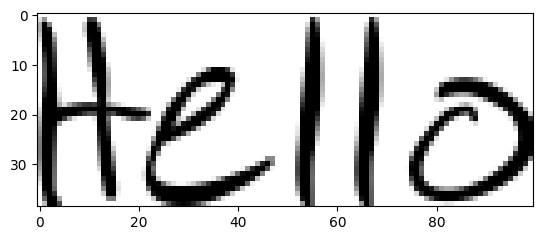

In [ ]:
plt.imshow(generate_image("Hello", font))

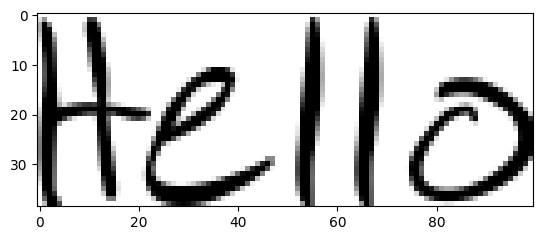

In [ ]:
plt.imshow(img_generator.generate_image(font, "Hello"))

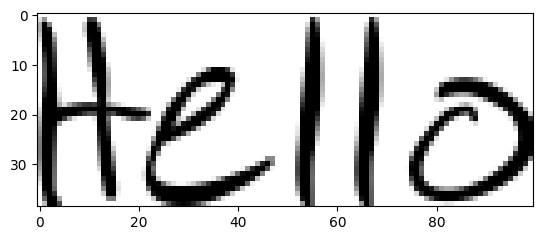

In [ ]:
plt.imshow(img_generator_2.generate_image(font, "Hello"))

In [ ]:
import matplotlib.colors as mcolors
import random

from PIL import ImageColor
# >>> ImageColor.getcolor("#23a9dd", "RGB")
# (35, 169, 221

def random_color_generator():
    color = random.choice(list(mcolors.CSS4_COLORS.values()))
    return color

def get_bbox_text(image):
  data = np.asarray(image)
  data = np.mean(data, -1)
  min_col = np.argmin(data, 0)
  min_row = np.argmin(data, 1)

  first_col = np.nonzero(min_col)[0][0]
  last_col = np.nonzero(min_col)[0][-1]

  first_row = np.nonzero(min_row)[0][0]
  last_row = np.nonzero(min_row)[0][-1]

  return (first_col, first_row, last_col, last_row)



# def generate_image_raw(word, font, background_colors=(255,255,255), text_color=(0, 0, 0), rand_disp=False):
#   """
#     word: str to generate
#     font: .ttf of the caligraphic font
#     background_colors: tuple (int, int, int) with the background colors to generate

#   """
#   txt = word
#   font = ImageFont.FreeTypeFont(font, 50)
#   img_size = (1500//2, 1000//2)


#   # Generate image by drawing character to character
#   img = Image.new("RGB", (img_size[0], img_size[1]), background_colors)
#   draw = ImageDraw.Draw(img)
#   draw.text((img_size[1]//25, img_size[0]//4), word[0], font=font, fill=text_color)
#   bbox = get_bbox_text(img)
#   avg_bbox = ((bbox[2]+bbox[0])/2, (bbox[3]+bbox[1])/2)

#   text = word[0]

#   for char in word[1:]:
#     text = char
#     bbox = np.array([bbox[-2], bbox[1]])

#     if rand_disp is True:
#       bbox = bbox + np.random.randint(-4, 5, size=(2,))
#     draw.text(bbox, text, font=font, fill=text_color)
#     bbox = get_bbox_text(img)
#     avg_bbox = ((bbox[2]+bbox[0])/2, (bbox[3]+bbox[1])/2)

#   # Crop image to fit the text
#   bbox = get_bbox_text(img)
#   img = img.crop(bbox)
#   data = np.asarray(img)

#   return data

def generate_image_raw(word, font, background_colors=(255,255,255), text_color=(0, 0, 0),):
  txt = word
  font = ImageFont.FreeTypeFont(font, 50)
  # img_size = (1500//2, 1000//2)
  img_size = (2000, 300)

  print(f'Generating word: {word}')

  # img = np.random.rand(3, img_size[0], img_size[1])
  # rand_color = np.random.randint(0, 256, size=(3,))

  # Generate white image
  img = Image.new("RGB", (img_size[0], img_size[1]), background_colors)

  draw = ImageDraw.Draw(img)

  # text_color = tuple(np.random.randint(0, 100, size=(3,)))
  draw.text((img_size[0]//25, img_size[1]//2), txt, font=font, fill=text_color)

  # Crop image to fit the text
  data = np.asarray(img)

  return data



In [ ]:
def calculate_bboxes(image):
  data = image
  data = np.mean(data, -1)
  min_col, min_row = np.argmin(data, 0), np.argmin(data, 1)

  first_col = np.nonzero(min_col)[0][0] - 1
  first_col = first_col - 1 if first_col > 1 else first_col
  last_col = np.nonzero(min_col)[0][-1] + 1
  last_col = last_col + 1 if last_col < data.shape[0] else last_col # 0 W

  first_row = np.nonzero(min_row)[0][0] - 1
  first_row = first_row - 1 if first_row > 0 else first_row
  last_row = np.nonzero(min_row)[0][-1] + 1
  last_row = last_row + 1 if last_row < data.shape[1] else last_row  # 1 H
  # last_row = data.shape[0]

  bbox_complete = (first_col, first_row, last_col, last_row)

  return bbox_complete

57
Generating word: climbing steadily." Group Captain Llewelyn Jones, Officer


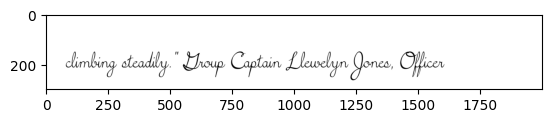

In [ ]:
txt = f'climbing steadily.\" Group Captain Llewelyn Jones, Officer'
print(len(txt))
rand_img = generate_image_raw(txt, htr_more_fonts[0], (255, 255, 255), (0,0,0))
plt.imshow(rand_img)


57
Generating word: climbing steadily." Group Captain Llewelyn Jones, Officer


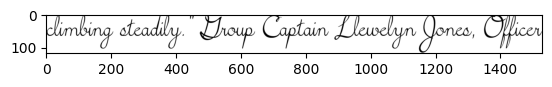

In [ ]:
txt = f'climbing steadily.\" Group Captain Llewelyn Jones, Officer'
print(len(txt))
rand_img = generate_image_raw(txt, htr_more_fonts[0], (255, 255, 255), (0,0,0))
bboxes = calculate_bboxes(rand_img)

rand_img = Image.fromarray(rand_img).crop(bboxes)
plt.imshow(rand_img)


In [ ]:
word = "Drawring,.h"
progressive_chars = [generate_image_raw(f'{word[:idx]}', htr_more_fonts[2], (255,255,255), (0,0,0)) for idx in range(len(word)+1)]

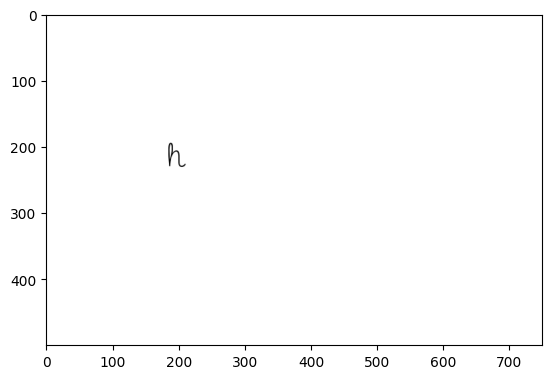

In [ ]:
# plt.imshow(progressive_chars[3])
plt.imshow(255+progressive_chars[-1]-progressive_chars[-2], cmap='binary')

In [ ]:
# Testing get_masked_image DELETE
def get_masked_image(word, font, background_colors=(255, 255, 255), text_color=(0, 0, 0)):
  complete_image = generate_image_raw(f'{word}', font, background_colors, text_color)
  # Treshold image to get a black and white image
  bbox = calculate_bboxes(complete_image)

  # First complete image
  image = complete_image
  image = Image.fromarray(image)
  crop = image.crop(bbox)
  # Convert image to binary mask
  crop = crop.convert("L")

  images_per_char = [crop]

  for i in range(len(word)):
    # image = 255 + progressive_chars[i+1] - progressive_chars[i]
    print(f'Generating inside loop for {word[:i]}, {word[:i+1]}')
    image_next = generate_image_raw(f'{word[:i+1]}', font, background_colors, text_color)
    image_prev = generate_image_raw(f'{word[:i]}', font, background_colors, text_color)
    image = 255 + image_next - image_prev
    image = Image.fromarray(image)
    image = image.crop(bbox)

    # Convert to a binary mask
    image = image.convert("L")
    print(np.array(image))
    print(np.count_nonzero(np.array(image)))
    print(np.array(image).shape)
    images_per_char.append(image)

  # return images_per_char
  return images_per_char

In [ ]:
word = 'Draw'
images_masked = get_masked_image(word, htr_more_fonts[4])
print(len(images_masked))
fig, ax = plt.subplots(1, len(images_masked))

for i in range(len(images_masked)):
  ax[i].imshow(255-np.array(images_masked[i]), cmap='binary')

Generating word: Draw
Generating inside loop for , D
Generating word: D
Generating word: 
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
4663
(45, 108)
Generating inside loop for D, Dr
Generating word: Dr
Generating word: D
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
4806
(45, 108)
Generating inside loop for Dr, Dra
Generating word: Dra
Generating word: Dr
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
4797
(45, 108)
Generating inside loop for Dra, Draw
Generating word: Draw
Generating word: Dra
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]

KeyboardInterrupt: 

Generating word: 
Generating word: D
Generating word: Dr
Generating word: Dra
Generating word: Draw
Generating word: Drawr
Generating word: Drawri
Generating word: Drawrin
Generating word: Drawring
Generating word: Drawringl
(19, 185, 61, 230)
42 45
1.0714285714285714 3 -3
(17.5, 185, 62.5, 230)


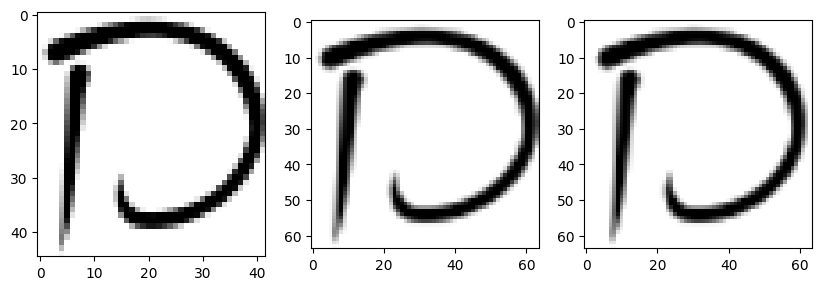

In [ ]:
# image = 255+progressive_chars[-1]-progressive_chars[-2]
word = "Drawringl"
progressive_chars = [generate_image_raw(f'{word[:idx]}', htr_more_fonts[4], (255,255,255), (0,0,0)) for idx in range(len(word)+1)]
image = 255+progressive_chars[1]-progressive_chars[0]
bbox_char = calculate_bboxes(image)
print(bbox_char) # bbox_complete = (first_col, first_row, last_col, last_row)
image = Image.fromarray(image)
crop = image.crop(bbox_char)


width, height = bbox_char[2] - bbox_char[0], bbox_char[3] - bbox_char[1]
print(width, height)
add_width = height - width
add_height = width - height
ratio_w_h = height / width
print(ratio_w_h, add_width, add_height)

if ratio_w_h > 1.0:
  bbox_squared = (bbox_char[0] - add_width / 2 , bbox_char[1], bbox_char[2] + add_width / 2, bbox_char[3])
else:
  bbox_squared = (bbox_char[0], bbox_char[1] - add_height / 2, bbox_char[2], bbox_char[3] + add_height / 2)

print(bbox_squared)

reescaled = image.crop(bbox_squared)
reescaled = reescaled.resize((64,64))


# Resize image to 64,64
# crop = crop.resize((64, 64))
# crop = crop.convert("L")

fig, ax = plt.subplots(1, 3, figsize=(10,16))

ax[0].imshow(crop)
ax[1].imshow(crop.resize((64,64)))
ax[2].imshow(reescaled)
# plt.imshow(crop, cmap='gray')

In [ ]:
### Crop image and reescale to 64,64

In [ ]:
# !mkdir generated_random_backgrounds
!rm -r generated_random_backgrounds/*

rm: cannot remove 'generated_random_backgrounds/*': No such file or directory


Generating word: Drawing
Generating word: Drawing
generated_random_backgrounds/image00000.png


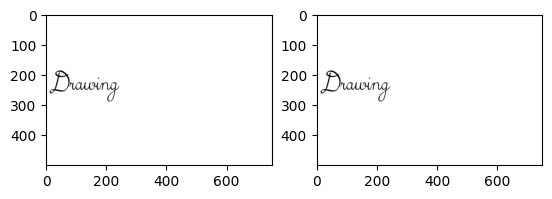

In [ ]:
from torchvision.transforms import v2
import torchvision
import torch

# fig = plt.figure(figsize=(60, 500))
# subplots = fig.subplots(1, 500)
word = "Drawing"
# images_per_char = get_masked_image(f'{word}', htr_more_fonts[2])

for i in range(1):
  fig, subplots = plt.subplots(1, 2)
  rand_img = generate_image_raw(word, htr_more_fonts[i])
  rand_img = torch.from_numpy(rand_img) / 255.

  rand_im2 = generate_image_raw(word, htr_more_fonts[i])
  rand_im2 = torch.from_numpy(rand_im2) / 255.


  # rand_img = v2.ColorJitter(brightness=.5, hue=.3)(rand_img)
  subplots[0].imshow(rand_img)
  subplots[1].imshow(rand_im2)
  num_img = str(i).zfill(5)
  path_image = f'generated_random_backgrounds/image{num_img}.png'
  print(path_image)
  # plt.savefig(path_image)

  # torchvision.utils.save_image(fig, f'generated_random_backgrounds/image{num_img}.png')

In [ ]:
!zip -r generated_random_backgrounds.zip generated_random_backgrounds/

In [ ]:
def calculate_bboxes(image):
  data = image
  data = np.mean(data, -1)
  min_col, min_row = np.argmin(data, 0), np.argmin(data, 1)

  first_col = np.nonzero(min_col)[0][0]
  first_col = first_col - 1 if first_col > 1 else first_col
  last_col = np.nonzero(min_col)[0][-1]
  last_col = last_col + 1 if last_col < data.shape[0] else last_col # 0 W

  first_row = np.nonzero(min_row)[0][0]
  first_row = first_row - 1 if first_row > 0 else first_row
  last_row = np.nonzero(min_row)[0][-1]
  last_row = last_row + 1 if last_row < data.shape[1] else last_row  # 1 H
  # last_row = data.shape[1]

  bbox_complete = (first_col, first_row, last_col, last_row)

  return bbox_complete

def get_masked_image(word, font, background_colors=(255, 255, 255), text_color=(0, 0, 0)):
  # 0 is the complete word
  progressive_chars = [generate_image_raw(f'{word[:idx]}', font, (255,255,255), (0,0,0)) for idx in range(len(word)+1)]
  progressive_chars = progressive_chars + [generate_image_raw(f'{word}', font, background_colors, text_color)] + [generate_image_raw(f'{word}', font, (255,255,255), (0,0,0))]

  plt.imshow(progressive_chars[-2])
  bbox = calculate_bboxes(progressive_chars[-2])

  # First complete image
  image = progressive_chars[-2]
  image = Image.fromarray(image)
  crop = image.crop(bbox)
  images_per_char = [crop]

  num_channel = len(crop.split())

  for i in range(len(word)):
    print(f'Calculating crop for char {word[i]}')
    image = 255 + progressive_chars[i+1] - progressive_chars[i]
    image = Image.fromarray(image)
    # image = image.crop(bbox)

    # Return only the cropped char
    bbox_char = calculate_bboxes(image)
    # crop = image.crop(bbox_char)

    width, height = bbox_char[2] - bbox_char[0], bbox_char[3] - bbox_char[1]
    print(width, height)
    add_width = height - width
    add_height = width - height
    ratio_w_h = height / width
    print(ratio_w_h, add_width, add_height)

    if ratio_w_h > 1.0:
      bbox_squared = (bbox_char[0] - add_width / 2 , bbox_char[1], bbox_char[2] + add_width / 2, bbox_char[3])
    else:
      bbox_squared = (bbox_char[0], bbox_char[1] - add_height / 2, bbox_char[2], bbox_char[3] + add_height / 2)


    crop = image.crop(bbox_squared)

    # Resize image to 64,64
    crop = crop.resize((64, 64))
    # crop = crop.convert("L")

    num_channel = len(crop.split())

    images_per_char.append(crop)

  return images_per_char


In [ ]:
# !mkdir gen_random_img/

Generating word: 
Generating word: H
Generating word: He
Generating word: Hel
Generating word: Hell
Generating word: Hello
Generating word: Hello
Generating word: Hello
Calculating crop for char H
Calculating crop for char e
Calculating crop for char l
Calculating crop for char l
Calculating crop for char o


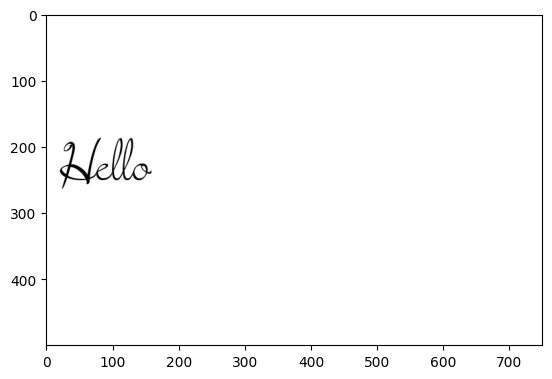

In [ ]:
masked_image = get_masked_image(f'Hello', htr_more_fonts[0])

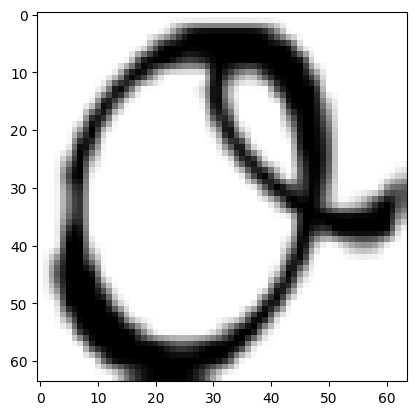

In [ ]:
plt.imshow(masked_image[5], cmap='binary')

Generating word: 
Generating word: T
Generating word: Te
Generating word: Tel
Generating word: Tele
Generating word: Telev
Generating word: Televi
Generating word: Televis
Generating word: Televisi
Generating word: Televisio
Generating word: Television
Generating word: Television
Generating word: Television
Calculating crop for char T
Calculating crop for char e
Calculating crop for char l
Calculating crop for char e
Calculating crop for char v
Calculating crop for char i
Calculating crop for char s
Calculating crop for char i
Calculating crop for char o
Calculating crop for char n


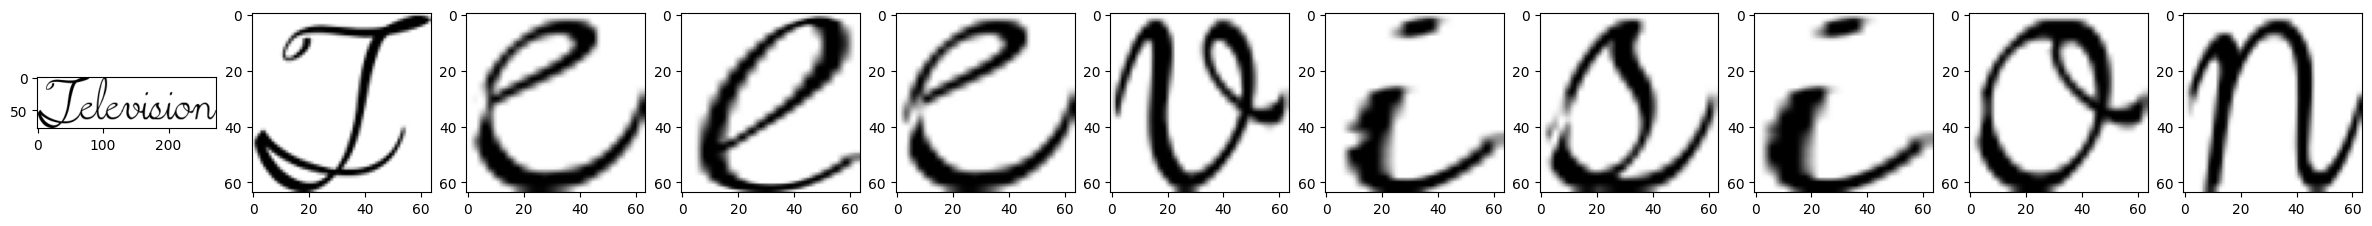

In [ ]:
word = 'Television'
fig = plt.figure(figsize=(30, 15))
subplots = fig.subplots(1, len(word)+1)
text_color = (0, 0, 0)
font = htr_more_fonts[0]
images_per_char = get_masked_image(f'{word}', font, (255,255,255), text_color, bbox_char=True)

exception_counter = 0

for i in range(len(word)+1):
  if i == 0:
    subplots[i].imshow(images_per_char[i], cmap='gray')
  else:
    subplots[i].imshow(images_per_char[i], cmap='gray')



In [ ]:
# !zip gen_random_img gen_random_img/*

(61, 284, 3)
(51972,)


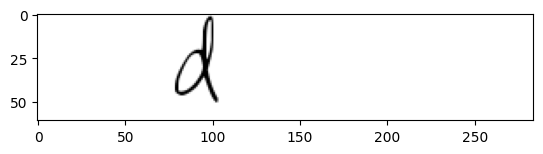

In [ ]:
# plt.imshow(images_per_char[1])

char = images_per_char[4]

char_data = np.asarray(char)
print(char_data.shape)

char_data_flattened = char_data.flatten()

char_data_reshaped = char_data_flattened.reshape((char_data.shape[0], char_data.shape[1], 3))
print(char_data.flatten().shape)

plt.imshow(char_data_reshaped)



In [ ]:
import torch
import torchvision

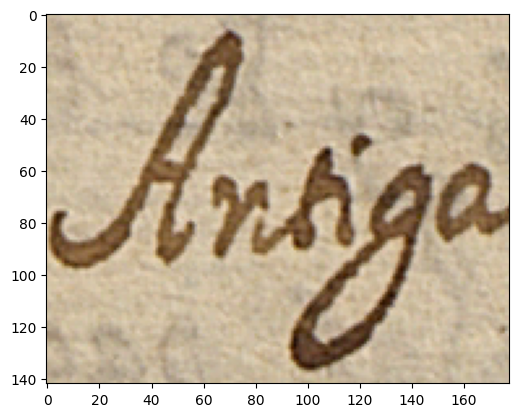

In [ ]:
image = torchvision.io.read_image(f'/content/esposalles_2.png')
plt.imshow(image.permute(1, 2, 0))

tensor([[[0.7647, 0.7765, 0.7843,  ..., 0.8353, 0.8863, 0.8196],
         [0.8039, 0.7882, 0.7843,  ..., 0.8353, 0.8510, 0.8314],
         [0.7843, 0.7490, 0.7451,  ..., 0.8588, 0.8353, 0.8235],
         ...,
         [0.7255, 0.7333, 0.6941,  ..., 0.7725, 0.7765, 0.7961],
         [0.7451, 0.7569, 0.7333,  ..., 0.8000, 0.7882, 0.7922],
         [0.7529, 0.7647, 0.7608,  ..., 0.7922, 0.7843, 0.7804]],

        [[0.7020, 0.7255, 0.7412,  ..., 0.7882, 0.8157, 0.7490],
         [0.7412, 0.7373, 0.7255,  ..., 0.7608, 0.7765, 0.7529],
         [0.7176, 0.6863, 0.6667,  ..., 0.7490, 0.7529, 0.7412],
         ...,
         [0.6549, 0.6471, 0.6235,  ..., 0.7137, 0.7059, 0.7255],
         [0.6863, 0.6941, 0.6863,  ..., 0.7451, 0.7255, 0.7333],
         [0.6902, 0.7098, 0.7098,  ..., 0.7451, 0.7294, 0.7255]],

        [[0.6118, 0.6196, 0.6235,  ..., 0.6941, 0.7020, 0.6392],
         [0.6392, 0.6353, 0.6235,  ..., 0.6706, 0.6667, 0.6471],
         [0.6039, 0.5961, 0.5843,  ..., 0.6784, 0.6471, 0.

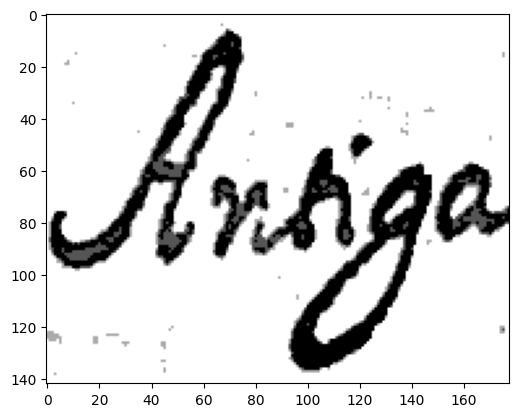

In [ ]:
image = image / 255.
print(image)
image = image > 0.5
image = image.float()
image = torch.round(image)
print(image)

print(image.shape)
print(image.reshape(-1).shape)

print((image == 1.).sum())
print((image == 0.).sum())


image = torch.mean(image, 0)
plt.imshow((1.0-image)*255., cmap='binary')

# image = image[1, :, :]



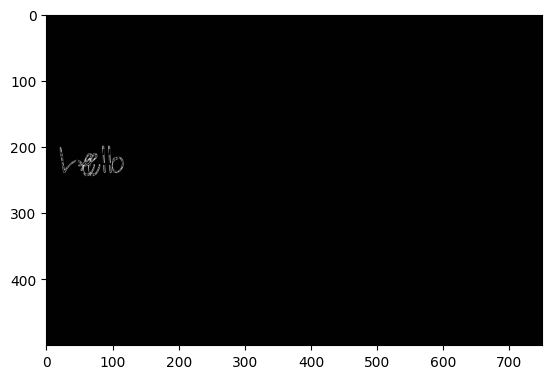

In [ ]:
plt.imshow(255-example-example1)

In [ ]:
!mkdir generated_words_longest
!mkdir generated_more_htr_fonts
# !rm -r generated_words_longest/*.png

In [ ]:
generate_dataset("generated_words_longest/", longest_words,  htr_fonts[:10])

NameError: ignored

In [ ]:
img_example = generate_image(f'{longest_words[0]}', htr_more_fonts[10])
plt.imshow(img_example)

NameError: ignored

Selected font handwritten-fonts/mulder_hw.ttf
{'h': 27.8125, 'e': 27.8125, 'l': 27.8125, 'o': 27.8125}
38.640625 39
(108, 37)


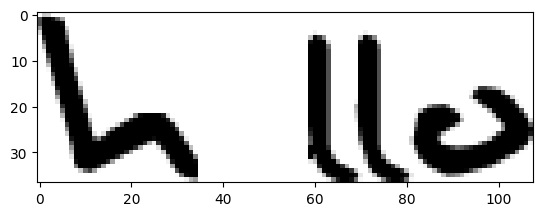

In [ ]:
img_example = generate_image(f'hello', htr_more_fonts[10])
# plt.imshow(img_example)

font = ImageFont.FreeTypeFont(htr_more_fonts[10], 50)
dict_lens = dict({c:font.getlength(char) for c in 'hello'})
print(dict_lens)
h_len = font.getlength("H")
e_len = font.getlength("e")
print(h_len, round(h_len))

print(img_example.size)
pixels = np.array(np.asarray(img_example))
pixels[:, int(h_len)-3:int(h_len)+int(e_len)] = 255

img_example = Image.fromarray(pixels)
plt.imshow(img_example)

In [ ]:
import torch
import torchvision

word = 'hello'
len_word = len(word)

font = ImageFont.FreeTypeFont(htr_more_fonts[10], 50)
dict_lens = dict({c:font.getlength(char) for c in word})
print(dict_lens)

list_images = []
complete_image = generate_image(f'{word}', htr_more_fonts[10])
complete_image = torchvision.transforms.ToTensor()(complete_image)#(torchvision.transforms.Resize((64, 400))(complete_image))
# images_ssl = complete_image

word_spaces = list(word)
for idx, char in enumerate(word):
  word_spaces_char = list(word_spaces)
  word_spaces_char[idx] = " "

  word_gen = ""

  for c in word_spaces_char:
    if c != " ":
      word_gen += str(c)
    else:
      print(f'Space!')
      word_gen += "\u0060"

  print(f'Word generated: {word_gen}')

  img_example = generate_image(f'{word_gen}', htr_more_fonts[10])
  img_example = torchvision.transforms.ToTensor()(torchvision.transforms.Resize((64, 400))(img_example))
  images_ssl = torch.cat((images_ssl, img_example), 1)
  print(img_example.shape)
  print(images_ssl.shape)


  # img_example = np.resize((64,256))
  # images_ssl = np.concatenate([images_ssl, img_example], axis=1)

  plt.imshow(images_ssl.permute(1, 2, 0))

{'h': 27.8125, 'e': 27.8125, 'l': 27.8125, 'o': 27.8125}
Selected font handwritten-fonts/mulder_hw.ttf


In [ ]:
from fontTools.ttLib import TTFont

def has_glyph(font, glyph):
    # print(font['cmap'])
    font = TTFont(font)
    for table in font['cmap'].tables:
        if ord(glyph) in table.cmap.keys():
            return True
    return False


In [ ]:
def generate_random_word(max_len):

  VOCAB = ""
  with open('vocab.txt', 'r') as f:
    VOCAB = f.readlines()
    VOCAB = [v[:-1] for v in VOCAB] + ['et'] + ['ç']


  word = ""
  chars = np.random.randint(len(VOCAB), size=np.random.randint(1, max_len))
  for char in chars:
    word += VOCAB[char]

  # print(VOCAB[chars])
  return word


In [ ]:
def generate_printable_word(word):
    font = np.random.choice(htr_more_fonts)
    can_generate = False
    while can_generate is False:
      for c in word:
        if has_glyph(font, c) is False:
          font = np.random.choice(htr_more_fonts)
          print(f'Selecting another font for generating {word}!. Cannot generate {c}')
          break
      can_generate = True

    return font

In [ ]:
lens_generated = []

for _ in range(500):
  gen_word = generate_random_word(25)
  font = generate_printable_word(gen_word)
  lens_generated.append(len(gen_word))
  print(f'Generated_word: {gen_word}')

lens_generated = np.array(lens_generated)
print(f'lenghts generated: mean {lens_generated.mean()}, std {lens_generated.std()}, min {lens_generated.min()}, max {lens_generated.max()}')

Generated_word: L
Generated_word: [<`0pl
Generated_word: '$#%H8rj/y* mUYsK$(,L=Y
Generated_word: v|q2!vBtA-/:
Generated_word: M\/et
Generated_word: 1
Generated_word: Vb\HN5l\eti\C[*,;
Generated_word: zZT
Generated_word: E+M9etr1w.(F"/D8}NAum
Generated_word: O0>765+$+M9cU
Generated_word: yL:ZIaF2W#1v*P
Generated_word: =GN]@Eycq
Generated_word: LZ0IRçRnM]G
Selecting another font for generating %m1ytC @;n)2mpp-:/!. Cannot generate %
Generated_word: %m1ytC @;n)2mpp-:/
Generated_word: hb!h,gi&uJ?hWt}
Generated_word: VP9C6+:aIL`m!T+S^62
Generated_word: ç iB1_
Selecting another font for generating ^\+sM!. Cannot generate ^
Generated_word: ^\+sM
Generated_word: #
Selecting another font for generating @jdi|d[E>G}(rn8F11S%2+7!. Cannot generate @
Generated_word: @jdi|d[E>G}(rn8F11S%2+7
Generated_word: +J\*XDBn4Q$T;. L2&&
Generated_word: r#w*hV8/
Generated_word: j<m}z%:\!8"3|u#2/>%u
Selecting another font for generating ç-Ca!#q(<et7&wdo6`0!. Cannot generate ç
Generated_word: ç-Ca!#q(<et7&wdo6`0
Ge

ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Generated_word: aAmx2M S3r
Selecting another font for generating 8sea<wD*6\%n$a6S/z^4!. Cannot generate <
Generated_word: 8sea<wD*6\%n$a6S/z^4
Generated_word: LJr4XLnjhM-mAcplR
Generated_word: wQ^Qk,Lç
Generated_word: >/3[2>IH&^&6>kpq9>993K
Generated_word: K
Generated_word: &6UHF5cvKN<3p0JMetb)et
Generated_word: ifQ8yt_e>qN|*AM5
Generated_word: .?6
Selecting another font for generating >OvGmj,J*CZga<-n}d68>1v!. Cannot generate >
Generated_word: >OvGmj,J*CZga<-n}d68>1v
Generated_word: QD{uu9Metetse5Det
Generated_word: Fm@A/
Generated_word: VP`?l<GçdA#<YB9\_iJ
Generated_word: [KuWF[9UçN d )V[S[a-`zl+
Generated_word: `@`,9TCs.VYr
Selecting another font for generating :'PV%\8HS0VLk:Rm9Gl{^d!. Cannot generate ^
Generated_word: :'PV%\8HS0VLk:Rm9Gl{^d
Generated_word: U|DY&U-xD+.{Andh9W_t[u7
Generated_word: [Kp;`<
Selecting another font for generating ne3YjC2Q%yZ\?\<$<@NV!Lz!. Cannot generate %
Generated_word: ne3YjC2Q%yZ\?\<$<@NV!Lz
Generated_word: xN\kMj*\ftg,T^Xrez1
Selecting another font f

KeyboardInterrupt: ignored

INITIALLY: Generated word: 4E2p;LST 2= with font handwritten-fonts/ChristinaHandwriting.ttf
Generating 4E2p;LST 2= with font handwritten-fonts/ChristinaHandwriting.ttf
Selected font handwritten-fonts/ChristinaHandwriting.ttf


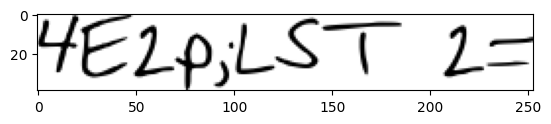

In [ ]:
random_word = generate_random_word(25)
font = np.random.choice(htr_more_fonts)
print(f'INITIALLY: Generated word: {random_word} with font {font}')

can_generate = False
while can_generate is False:
  for c in random_word:
    if has_glyph(font, c) is False:
      font = np.random.choice(htr_more_fonts)
      print(f'Selecting another font!')
      break
  can_generate = True


if can_generate is True:
  print(f'Generating {random_word} with font {font}')
  img_example = generate_image(f'{random_word}', font)
  plt.imshow(img_example)

In [ ]:
MAX_LEN = 25
VOCAB = ""
with open('vocab.txt', 'r') as f:
  VOCAB = f.readlines()
  VOCAB = [v[:-1] for v in VOCAB] + ['et'] + ['ç']

for _ in range(100):

    return word, font


In [ ]:
for _ in range(100):


In [ ]:
def gen_rand():

	#POSSIBLE VOCABULARY:
	vocab='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

	#vocab='0123456789abcdefghijklmnopqrstuvwxyz'
	# vocab='0123456789'
	#vocab='0123456789abcdefg'

	buf = ""
	max_len = random.randint(1, 7)
	for i in range(max_len):
		buf += random.choice(vocab)
	return buf

for i in range(10000):
  word = gen_rand()
  img = generate_image(word, htr_more_fonts[7])
  img.save("mi_dataset/"+word+".jpg")



In [ ]:
!zip mi_dataset mi_dataset/*

Se han truncado las últimas 5000 líneas del flujo de salida.
  adding: mi_dataset/hL.jpg (deflated 15%)
  adding: mi_dataset/Hl.jpg (deflated 13%)
  adding: mi_dataset/hlp.jpg (deflated 12%)
  adding: mi_dataset/HlPx.jpg (deflated 9%)
  adding: mi_dataset/HLwl.jpg (deflated 8%)
  adding: mi_dataset/hlY04.jpg (deflated 8%)
  adding: mi_dataset/hM03kP8.jpg (deflated 5%)
  adding: mi_dataset/HmI1.jpg (deflated 9%)
  adding: mi_dataset/Hm.jpg (deflated 13%)
  adding: mi_dataset/hmJthDP.jpg (deflated 6%)
  adding: mi_dataset/hmkZ.jpg (deflated 9%)
  adding: mi_dataset/Hmmlt.jpg (deflated 8%)
  adding: mi_dataset/hMtMPEr.jpg (deflated 5%)
  adding: mi_dataset/HN6C.jpg (deflated 7%)
  adding: mi_dataset/HNBBt5.jpg (deflated 5%)
  adding: mi_dataset/HND6aO.jpg (deflated 5%)
  adding: mi_dataset/hnfMJ.jpg (deflated 7%)
  adding: mi_dataset/hNg.jpg (deflated 9%)
  adding: mi_dataset/hnlW.jpg (deflated 10%)
  adding: mi_dataset/Hnx.jpg (deflated 11%)
  adding: mi_dataset/hOjF.jpg (deflated 8%)
  

In [ ]:
!mkdir generated_words_cvpr

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
print(htr_more_fonts[9])

# IAM = ['the',',','.','of','to','a','and','in','"','is','that','was','for','he','be','with','as','on','it','had','his','I','The','Mr.',"'",'by','at','not','are','an', '243']
# washington = ['the','to','and','of','are','for','be','that','you','I','with','-','at','is','in','as','your','You','a','which','will','Captain','they','from','Orders','1755.','Vc.','have','see','Fort']
# saint_gall = ['et','ad','in','cum','ut','Et','qui','eius','de','se','e','quod','quae','di','non','per','aut']
# esposalles = ['de','y','pages','ab','rebere','filla','Bara','donsella','dia','fill','en','a','habitant','defuncts','defunct','dit','Pere','Dit','del','St','viuda','Juan','parayre','viudo','t','Antoni','Elisabeth','#', 'Jua','Margarida']

with open('top_IAM.txt', 'r') as f:
  IAM = f.readlines()
  IAM = [word[:-1] for word in IAM]

with open('top_washington.txt', 'r') as f:
  washington = f.readlines()
  washington = [word[:-1] for word in washington]

with open('top_saint_gall.txt', 'r') as f:
  saint_gall = f.readlines()
  saint_gall = [word[:-1] for word in saint_gall]

with open('top_esposalles.txt', 'r') as f:
  esposalles = f.readlines()
  esposalles = [word[:-1] for word in esposalles]


images = []

# fig, axes = plt.subplots(2, 6)
all_words = IAM + washington + saint_gall + esposalles

for i in range(400):
  # i, j = i % 3, i % 4
  # print(i, j)
  word = np.random.choice(all_words)
  if len(word) < 3 or word[::-2] == '..':
    continue
  font = np.random.choice(htr_more_fonts)
  # image = np.array(generate_image(word, font))
  image = generate_image(word, font)
  image = image.resize((256, 64))

  width, height = image.size

  new_width = width + 2 + 2
  new_height = height + 2 + 2

  canvas = Image.new(image.mode, (new_width, new_height), (0, 0, 0))
  canvas.paste(image, (2, 2))
  image = canvas


  # print(image)
  # print(f'ímage shape: {image.shape}')
  # axes[i, j].imshow(image)
  # axes[i,j].xaxis.set_visible(False)
  # axes[i,j].yaxis.set_visible(False)
  images.append(image)

  print(f'Saving word: {word}')
  image.save("generated_words_cvpr/"+word+".png")

# img_example = generate_image("cabeço d'or", htr_more_fonts[9])



352


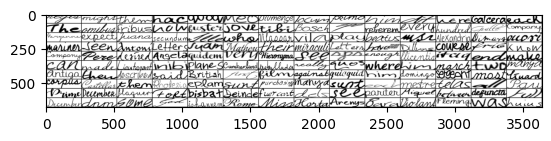

In [ ]:
print(len(images))

rows, cols = 10, 14

grid = image_grid(images[:rows*cols], rows, cols)

plt.imshow(grid)

grid.save('grid.pdf')

In [ ]:
# !pip3 install opencv-python
# import cv2

In [ ]:
!rm -r generated_words_cvpr.zip
!zip -r generated_words_cvpr.zip generated_words_cvpr/

rm: cannot remove 'generated_words_cvpr.zip': No such file or directory
  adding: generated_words_cvpr/ (stored 0%)
  adding: generated_words_cvpr/Prats.png (stored 0%)
  adding: generated_words_cvpr/particular.png (stored 0%)
  adding: generated_words_cvpr/Palau.png (stored 0%)
  adding: generated_words_cvpr/strong.png (deflated 0%)
  adding: generated_words_cvpr/our.png (stored 0%)
  adding: generated_words_cvpr/engage.png (stored 0%)
  adding: generated_words_cvpr/sps.png (stored 0%)
  adding: generated_words_cvpr/same.png (stored 0%)
  adding: generated_words_cvpr/few.png (stored 0%)
  adding: generated_words_cvpr/some.png (stored 0%)
  adding: generated_words_cvpr/septem.png (stored 0%)
  adding: generated_words_cvpr/for.png (stored 0%)
  adding: generated_words_cvpr/1755..png (stored 0%)
  adding: generated_words_cvpr/igitur.png (deflated 0%)
  adding: generated_words_cvpr/Vinyals.png (deflated 1%)
  adding: generated_words_cvpr/Vilamajor.png (stored 0%)
  adding: generated_words

In [ ]:
generate_dataset("generated_more_htr_fonts/", longest_words,  htr_more_fonts[:10])

## Analyze 'rare' character generation

In [ ]:
from fontTools.ttLib import TTFont
from fontTools.unicode import Unicode

# font = TTFont('/path/to/font.ttf')

def has_glyph(font, glyph):
    # print(font['cmap'])
    font = TTFont(font)
    for table in font['cmap'].tables:
        if ord(glyph) in table.cmap.keys():
            return True
    return False

c_trencada_fonts = 0

for font in htr_more_fonts:
  if has_glyph(font, 'ç'):
    c_trencada_fonts += 1

et_fonts = 0

for font in htr_more_fonts:
  if has_glyph(font, 'α'):
    et_fonts += 1


print(f'Total number of fonts. {len(htr_more_fonts)}. Can generate ç: {c_trencada_fonts}')
print(f'Total number of fonts. {len(htr_more_fonts)}. Can generate α: {et_fonts}')



ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Total number of fonts. 397. Can generate ç: 295
Total number of fonts. 397. Can generate α: 24


In [ ]:
with open('vocab.txt', 'r') as f:
  vocab_to_generate = f.readlines()
  vocab_to_generate = [v[:-1] for v in vocab_to_generate] + ['et'] + ['ç']


vocab_to_generate_dict = dict()
for char in vocab_to_generate:
  if char == 'et':
    char = 'α'

  vocab_to_generate_dict[char] = 0
  print(f'Char: {char}')


  if len(char) == 0:
    continue

  for font in htr_more_fonts:
    if has_glyph(font, char):
      vocab_to_generate_dict[char] += 1

print(vocab_to_generate_dict)









ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char:  


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: !


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: "


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: #


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: $


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: %


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: &


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: '


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: (


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: )


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: *


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: +


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: ,


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: -


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: .


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: /


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 0


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 1


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 2


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 3


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 4


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 5


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 6


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 7


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 8


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 9


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: :


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: ;


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: <


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: =


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: >


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: ?


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: @


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: A


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: B


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: C


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: D


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: E


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: F


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: G


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: H


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: I


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: J


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: K


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: L


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: M


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: N


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: O


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: P


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: Q


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: R


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: S


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: T


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: U


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: V


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: W


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: X


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: Y


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: Z


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: [


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: \


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: ]


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: ^


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: _


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: `


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: a


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: b


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: c


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: d


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: e


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: f


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: g


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: h


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: i


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: j


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: k


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: l


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: m


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: n


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: o


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: p


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: q


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: r


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: s


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: t


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: u


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: v


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: w


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: x


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: y


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: z


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: {


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: |


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: }


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: 
Char: α


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


Char: ç
{' ': 396, '!': 374, '"': 351, '#': 358, '$': 365, '%': 349, '&': 356, "'": 367, '(': 363, ')': 363, '*': 352, '+': 356, ',': 384, '-': 363, '.': 384, '/': 360, '0': 397, '1': 397, '2': 397, '3': 397, '4': 397, '5': 397, '6': 397, '7': 397, '8': 397, '9': 397, ':': 362, ';': 361, '<': 340, '=': 355, '>': 340, '?': 368, '@': 364, 'A': 397, 'B': 397, 'C': 397, 'D': 397, 'E': 397, 'F': 397, 'G': 397, 'H': 397, 'I': 397, 'J': 397, 'K': 397, 'L': 397, 'M': 397, 'N': 397, 'O': 397, 'P': 397, 'Q': 397, 'R': 397, 'S': 397, 'T': 397, 'U': 397, 'V': 397, 'W': 397, 'X': 397, 'Y': 397, 'Z': 397, '[': 339, '\\': 338, ']': 338, '^': 313, '_': 341, '`': 327, 'a': 397, 'b': 397, 'c': 397, 'd': 397, 'e': 397, 'f': 397, 'g': 397, 'h': 397, 'i': 397, 'j': 397, 'k': 397, 'l': 397, 'm': 397, 'n': 397, 'o': 397, 'p': 397, 'q': 397, 'r': 397, 's': 397, 't': 397, 'u': 397, 'v': 397, 'w': 397, 'x': 397, 'y': 397, 'z': 397, '{': 331, '|': 331, '}': 330, '': 0, 'α': 24, 'ç': 295}


In [ ]:
least_available = dict(sorted(vocab_to_generate_dict.items(), key=lambda x: x[1], reverse=False)[1:35])
print()
print(least_available)
print()


{'α': 24, 'ç': 295, '^': 313, '`': 327, '}': 330, '{': 331, '|': 331, '\\': 338, ']': 338, '[': 339, '<': 340, '>': 340, '_': 341, '%': 349, '"': 351, '*': 352, '=': 355, '&': 356, '+': 356, '#': 358, '/': 360, ';': 361, ':': 362, '(': 363, ')': 363, '-': 363, '@': 364, '$': 365, "'": 367, '?': 368, '!': 374, ',': 384, '.': 384, ' ': 396}



In [ ]:
# Get least available
vocab_least_available = least_available.keys()
print(vocab_least_available)

dict_keys(['α', 'ç', '^', '`', '}', '{', '|', '\\', ']', '[', '<', '>', '_', '%', '"', '*', '=', '&', '+', '#', '/', ';', ':', '(', ')', '-', '@', '$', "'", '?', '!', ',', '.', ' '])


In [ ]:
print()
print(vocab_to_generate_dict)
print()


{' ': 396, '!': 374, '"': 351, '#': 358, '$': 365, '%': 349, '&': 356, "'": 367, '(': 363, ')': 363, '*': 352, '+': 356, ',': 384, '-': 363, '.': 384, '/': 360, '0': 397, '1': 397, '2': 397, '3': 397, '4': 397, '5': 397, '6': 397, '7': 397, '8': 397, '9': 397, ':': 362, ';': 361, '<': 340, '=': 355, '>': 340, '?': 368, '@': 364, 'A': 397, 'B': 397, 'C': 397, 'D': 397, 'E': 397, 'F': 397, 'G': 397, 'H': 397, 'I': 397, 'J': 397, 'K': 397, 'L': 397, 'M': 397, 'N': 397, 'O': 397, 'P': 397, 'Q': 397, 'R': 397, 'S': 397, 'T': 397, 'U': 397, 'V': 397, 'W': 397, 'X': 397, 'Y': 397, 'Z': 397, '[': 339, '\\': 338, ']': 338, '^': 313, '_': 341, '`': 327, 'a': 397, 'b': 397, 'c': 397, 'd': 397, 'e': 397, 'f': 397, 'g': 397, 'h': 397, 'i': 397, 'j': 397, 'k': 397, 'l': 397, 'm': 397, 'n': 397, 'o': 397, 'p': 397, 'q': 397, 'r': 397, 's': 397, 't': 397, 'u': 397, 'v': 397, 'w': 397, 'x': 397, 'y': 397, 'z': 397, '{': 331, '|': 331, '}': 330, '': 0, 'α': 24, 'ç': 295}



In [ ]:
def get_chars_available(fonts, vocab):
  vocab_to_generate_dict = dict()
  for char in vocab:
    if char == 'et':
      char = 'α'

    vocab_to_generate_dict[char] = 0

    if len(char) == 0:
      continue

    for font in fonts:
      if has_glyph(font, char):
        vocab_to_generate_dict[char] += 1

  print(vocab_to_generate_dict)

  return vocab_to_generate


In [ ]:
print(get_chars_available(htr_more_fonts[:40], vocab_least_available))

{'α': 1, 'ç': 29, '^': 32, '`': 34, '}': 32, '{': 32, '|': 33, '\\': 34, ']': 32, '[': 32, '<': 34, '>': 34, '_': 36, '%': 35, '"': 36, '*': 35, '=': 36, '&': 36, '+': 36, '#': 36, '/': 36, ';': 37, ':': 37, '(': 36, ')': 36, '-': 37, '@': 36, '$': 34, "'": 37, '?': 38, '!': 38, ',': 39, '.': 39, ' ': 39}
[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '', 'et', 'ç']


In [ ]:
!rm -r fold*.txt

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(htr_more_fonts)


for i, (train_index, test_index) in enumerate(kf.split(htr_more_fonts)):
  print(f"Fold {i}:")
  # print(f"  Train: index={train_index}")
  print(f"  Test: index={test_index}. LEN FONTS {len(test_index)}")

  fonts_fold, fonts_fold_str = [], ""
  for idx in test_index:
    fonts_fold += [htr_more_fonts[idx]]
    fonts_fold_str += htr_more_fonts[idx] + "\n"

  print(get_chars_available(fonts_fold, vocab_least_available))

  f = open(f'fold_{i}_fonts.txt', 'w')
  f.writelines(fonts_fold_str[:-1])
  f.close()



Fold 0:
  Test: index=[  9  14  18  22  25  26  35  37  38  46  48  49  56  62  63  72  80  81
  82  86  88  89  90  92  95  97 102 104 108 110 118 121 122 123 124 126
 139 141 142 143 147 150 168 175 181 186 189 191 192 194 195 197 204 214
 218 219 221 224 225 230 232 233 239 240 246 257 258 259 260 264 272 273
 277 288 289 295 304 305 308 309 311 322 328 334 335 337 354 363 366 369
 372 374 375 380 382 386 390 392 393 396]. LEN FONTS 100


ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.


{'α': 6, 'ç': 67, '^': 81, '`': 79, '}': 80, '{': 80, '|': 83, '\\': 85, ']': 82, '[': 83, '<': 86, '>': 86, '_': 86, '%': 85, '"': 86, '*': 88, '=': 86, '&': 86, '+': 86, '#': 86, '/': 89, ';': 88, ':': 88, '(': 89, ')': 89, '-': 89, '@': 90, '$': 91, "'": 90, '?': 91, '!': 93, ',': 96, '.': 96, ' ': 100}
[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '', 'et', 'ç']
Fold 1:
  Test: index=[  8  13  15  17  20  24  27  30  32  33  52  58  64  65  66  71  79  87
  91 103 107 109 111 112 114 117 119 125 130 131 135 140 146 149 153 157
 163 164 169 171 174 176 177 180 188 

ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1, platEncID 0, format 0 offset 20. Skipping table.
ERROR:fontTools.ttLib.tables._c_m_a_p:cmap subtable is reported as having zero length: platformID 1,

{'α': 6, 'ç': 78, '^': 80, '`': 79, '}': 86, '{': 86, '|': 86, '\\': 86, ']': 86, '[': 86, '<': 84, '>': 84, '_': 84, '%': 86, '"': 84, '*': 87, '=': 88, '&': 85, '+': 88, '#': 88, '/': 88, ';': 90, ':': 90, '(': 89, ')': 89, '-': 88, '@': 89, '$': 90, "'": 89, '?': 89, '!': 89, ',': 95, '.': 95, ' ': 99}
[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '', 'et', 'ç']
Fold 2:
  Test: index=[  0   1   2   3   6  10  12  16  21  23  36  40  44  45  50  51  55  57
  59  67  68  69  73  74  75  77  83  93  96  99 101 106 113 120 127 144
 151 152 154 155 156 159 165 166 178 1

In [ ]:
italics, bold, regular = 0, 0, 0
for font in htr_more_fonts:
  if "italic" in font:
    italics += 1
  if "Bold" in font:
    bold += 1
  if "Regular" in font or "regular" in font: #Regular
    regular += 1


print(italics, bold, regular)

1 17 30


In [ ]:
!mkdir fold0 fold1 fold2 fold3

In [ ]:
# !rm -r fold0 fold1 fold2 fold3

In [ ]:
import shutil
# shutil.copyfile(src, dst)


for fold in range(4):
  file = f'fold_{fold}_fonts.txt'
  fold = f'fold{fold}/'
  print(f'File: {file}')

  with open(file, 'r') as f:
    fonts_fold = f.readlines()

    for font in fonts_fold:
      font = font[:-1] if font[-1] == '\n' else font
      shutil.copy(font, fold)



File: fold_0_fonts.txt
File: fold_1_fonts.txt
File: fold_2_fonts.txt
File: fold_3_fonts.txt


In [ ]:
!zip -r fold0.zip fold0/
!zip -r fold1.zip fold1/
!zip -r fold2.zip fold2/
!zip -r fold3.zip fold3/

  adding: fold0/ (stored 0%)
  adding: fold0/JarofHearts.ttf (deflated 36%)
  adding: fold0/QEKevinKnowles.ttf (deflated 19%)
  adding: fold0/Scribble.ttf (deflated 36%)
  adding: fold0/Yesterday Again.ttf (deflated 33%)
  adding: fold0/Follow Your Dreams.ttf (deflated 44%)
  adding: fold0/The_Left-Handed_-_Cursiva.ttf (deflated 33%)
  adding: fold0/SCRIPTIN.ttf (deflated 39%)
  adding: fold0/James_Fajardo.ttf (deflated 33%)
  adding: fold0/EscritaToska.ttf (deflated 32%)
  adding: fold0/KubaReczny_1.2.ttf (deflated 34%)
  adding: fold0/AlexBrush-Regular.ttf (deflated 48%)
  adding: fold0/QEJohnCaplin.ttf (deflated 17%)
  adding: fold0/QEGHHughes.ttf (deflated 19%)
  adding: fold0/artskyd.ttf (deflated 35%)
  adding: fold0/Byron.ttf (deflated 41%)
  adding: fold0/HighBoat.ttf (deflated 35%)
  adding: fold0/Felipa-Regular.ttf (deflated 46%)
  adding: fold0/Hesster Mofet DIRTY_TRIAL.ttf (deflated 45%)
  adding: fold0/JennaSue.ttf (deflated 35%)
  adding: fold0/Hermandec-l.ttf (deflated 4

In [ ]:
!unzip fold0.zip

Archive:  fold0.zip
replace fold0/JarofHearts.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!zip -r generated_more_fonts.zip generated_more_htr_fonts/

In [ ]:
!du -h . -d 1

In [ ]:
!pip list | grep torch

In [ ]:
# Generate word with augmentation
import torch
from torchvision.transforms import v2

import matplotlib.pyplot as plt

font = random.choice(htr_fonts)
word = random.choice(unique_words)
print(font)


image = generate_image(word, font)

train_transforms = v2.Compose([
                  v2.ToTensor(),
                  # v2.RandomErasing(p=1, scale=(0.02, 0.5), ratio=(1, 5), value=0, inplace=False),
                  # Distortions
                  # With probability 0.5:
                  v2.RandomApply([v2.ElasticTransform(alpha=15., sigma=5., fill=255)], p=1),
                  v2.RandomApply([v2.RandomRotation(degrees=3, fill=255)], p=1),
                  v2.RandomApply([v2.RandomAffine(degrees=(0, 0), translate=(0.01, 0.05), fill=255)] , p=1),
              ])

fig, ax = plt.subplots(2,1)


ax[0].imshow(image)
ax[1].imshow(train_transforms(image).permute(1, 2, 0))


In [ ]:
!zip -r generated_words.zip generated_words/

In [ ]:
!curl -X GET \
     "https://datasets-server.huggingface.co/rows?dataset=wikitext&config=wikitext-103-raw-v1&split=train&offset=0&limit=100"

{"features":[{"feature_idx":0,"name":"text","type":{"dtype":"string","_type":"Value"}}],"rows":[{"row_idx":0,"row":{"text":""},"truncated_cells":[]},{"row_idx":1,"row":{"text":" = Valkyria Chronicles III = \n"},"truncated_cells":[]},{"row_idx":2,"row":{"text":""},"truncated_cells":[]},{"row_idx":3,"row":{"text":" Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the \" Nameless \" , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit 

In [ ]:
!pip install huggingface
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 7.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

# dataset = load_dataset('wikitext', 'wikitext-103-v1')

dataset = load_dataset('wikitext', 'wikitext-2-v1')


Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [ ]:
print(dataset["train"]['text'][:10])

['', ' = Valkyria Chronicles III = \n', '', ' Senjō no Valkyria 3 : <unk> Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . <unk> the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " <unk> Raven " . \n', " The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more <unk> for series 

In [ ]:
vocab = open('vocab.txt', 'r').read().split('\n')
vocab = sorted(list(vocab)) + ['et'] + ['ç']

print(vocab)

[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'et', 'ç']


In [ ]:
from tqdm import tqdm
words_train = set()
cleaned_words = set()
wikitext_stats_train = dict()
total_words = 0

for sentence in tqdm(dataset["train"]["text"]):
  splitted = sentence.split(" ")

  for _word in splitted:
    if _word not in wikitext_stats_train:
      wikitext_stats_train[_word] = 1
    else:
      wikitext_stats_train[_word] += 1

    if len(_word) == 0:
      continue
      print(f'Word with len 0! {_word}')

    total_words += 1


  # cleaned_words.update([_word])

  words_train.update(splitted)

  # print(splitted)

print(sorted(words_train, reverse=False)[300:400])
print((len(words_train)))
print(total_words)

100%|██████████| 36718/36718 [00:01<00:00, 32475.63it/s]

['136', '137', '138', '139', '1390', '13b', '13th', '14', '140', '1400', '1402', '141', '142', '1422', '1425', '143', '1435', '1438', '144', '1440', '145', '146', '147', '148', '1489', '149', '14th', '15', '150', '1500', '1501', '150th', '151', '1514', '1518', '151Eu', '151st', '152', '152Eu', '153', '1530', '1532', '1534', '153Eu', '154', '1540', '1542', '1544', '1545', '1546', '1549', '154Eu', '155', '1550', '1552', '1553', '1554', '1555', '1558', '156', '1560', '1563', '1567', '1569', '156th', '157', '1573', '157th', '158', '1580', '159', '1592', '1593', '1596', '15th', '16', '160', '1600', '1603', '1604', '1605', '1608', '1609', '161', '1610', '1611', '1612', '1613', '1615', '1616', '1617', '1618', '1619', '162', '1620', '1621', '1622', '1623', '1624', '1625']
33279
2075677


In [ ]:
from tqdm import tqdm
words_val = set()
wikitext_stats_val = dict()

for sentence in tqdm(dataset["validation"]["text"]):
  splitted = sentence.split(" ")

  for _word in splitted:
    if _word not in wikitext_stats_val:
      wikitext_stats_val[_word] = 1
    else:
      wikitext_stats_val[_word] += 1

    if len(_word) == 0:
      continue
      print(f'Word with len 0! {_word}')

  words_val.update(splitted)

  # print(splitted)


100%|██████████| 3760/3760 [00:00<00:00, 26123.00it/s]


In [ ]:
from tqdm import tqdm
words_test = set()
wikitext_stats_test = dict()

for sentence in tqdm(dataset["test"]["text"]):
  splitted = sentence.split(" ")

  for _word in splitted:
    if _word not in wikitext_stats_test:
      wikitext_stats_test[_word] = 1
    else:
      wikitext_stats_test[_word] += 1

    if len(_word) == 0:
      continue
      print(f'Word with len 0! {_word}')

  words_test.update(splitted)

  # print(splitted)


100%|██████████| 4358/4358 [00:00<00:00, 18385.13it/s]


In [ ]:
print(sorted(words_train, reverse=False)[300:400])
print(f'Unique train {len(words_train)}')
total_words_train = sum(wikitext_stats_train.values())
print(f'Total words train {total_words_train}')

['136', '137', '138', '139', '1390', '13b', '13th', '14', '140', '1400', '1402', '141', '142', '1422', '1425', '143', '1435', '1438', '144', '1440', '145', '146', '147', '148', '1489', '149', '14th', '15', '150', '1500', '1501', '150th', '151', '1514', '1518', '151Eu', '151st', '152', '152Eu', '153', '1530', '1532', '1534', '153Eu', '154', '1540', '1542', '1544', '1545', '1546', '1549', '154Eu', '155', '1550', '1552', '1553', '1554', '1555', '1558', '156', '1560', '1563', '1567', '1569', '156th', '157', '1573', '157th', '158', '1580', '159', '1592', '1593', '1596', '15th', '16', '160', '1600', '1603', '1604', '1605', '1608', '1609', '161', '1610', '1611', '1612', '1613', '1615', '1616', '1617', '1618', '1619', '162', '1620', '1621', '1622', '1623', '1624', '1625']
Unique train 33279
Total words train 2112395


In [ ]:
print(sorted(words_val, reverse=False)[300:400])
print(f'Unique val {len(words_val)}')
total_words_val = sum(wikitext_stats_val.values())
print(f'Total words val {total_words_val}')

['195', '1950', '1950s', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '196', '1960', '1960s', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1970s', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1980s', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '2', '20', '200', '2000', '2000s', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '202', '203', '206', '208', '20th', '21', '210', '212', '216', '21st', '22', '220', '222', '223', '224', '22nd', '23', '230', '2300', '231']
Unique val 13778
Total words val 220107


In [ ]:
print(sorted(words_test, reverse=False)[300:400])
print(f'Unique test {len(words_test)}')
total_words_test = sum(wikitext_stats_test.values())
print(f'Total words test {total_words_test}')

['1920', '1920s', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '193', '1930', '1930s', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1940s', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '195', '1950', '1950s', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '196', '1960', '1960s', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '197', '1970', '1970s', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1980s', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '199', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '2', '20', '200', '2000', '2001']
Unique test 14144
Total words test 248460


In [ ]:
top_words_wikitext = sorted(wikitext_stats_train.items(), key=lambda x:x[1], reverse=True)[:10]

print(top_words_wikitext)

print(len(wikitext_stats_train.keys()))

[('the', 113161), (',', 99913), ('.', 73388), ('of', 56889), ('<unk>', 54625), ('and', 50603), ('in', 39453), ('to', 39190), ('', 36718), ('a', 34237)]
33279


In [ ]:
# Clean words

cleaned_stats = dict()

for word in wikitext_stats_train.keys():
    _word = ""
    for c in word:
      if c in vocab:
        _word += c
      else:
        continue

    cleaned_stats[_word] = wikitext_stats_train[word]

print(len(cleaned_stats.keys()))


33169


In [ ]:
print(sorted(cleaned_stats.items(), key=lambda x:x[1], reverse=True)[30:50])

[('not', 194870), (';', 191058), ('first', 189667), ('their', 186430), (':', 181247), ('also', 179733), ('her', 176758), ('its', 174862), ('or', 166456), ('have', 163459), ('one', 163454), ('@.@', 158057), ('two', 156709), ('who', 155431), ('been', 152103), ('has', 150736), ('@,@', 149068), ('this', 145573), ('He', 141128), ('they', 135556)]


In [ ]:
print(len(cleaned_stats.keys()))

for delete_token in ['', ' ', '\n', '\t', '<unk>']:
  try:
    print(f'DELETING {delete_token}!')
    del cleaned_stats[delete_token]
  except Exception:
    print(f'{delete_token} not found!')

print(len(cleaned_stats.keys()))

33169
DELETING !
DELETING  !
  not found!
DELETING 
!

 not found!
DELETING 	!
	 not found!
DELETING <unk>!
33167


In [ ]:
print(sorted(cleaned_stats.items(), key=lambda x:x[1], reverse=True)[:100])

[('the', 5584823), (',', 4971506), ('.', 3624899), ('of', 2737620), ('and', 2499539), ('to', 1979164), ('=', 1466599), ('"', 1338685), ('was', 1075325), ('@-@', 881576), ('The', 853819), ('that', 679711), ('for', 675287), ('as', 675032), ('with', 632025), (')', 583875), ('(', 583522), ('is', 512782), ('from', 431900), ('at', 417082), ('were', 354550), ('it', 326416), ('an', 306216), ('had', 292528), ('In', 281598), ('which', 275598), ('be', 235033), ('but', 203336), ('are', 203212), ('not', 194870), (';', 191058), ('first', 189667), ('their', 186430), (':', 181247), ('also', 179733), ('her', 176758), ('its', 174862), ('or', 166456), ('have', 163459), ('one', 163454), ('@.@', 158057), ('two', 156709), ('who', 155431), ('been', 152103), ('has', 150736), ('@,@', 149068), ('this', 145573), ('He', 141128), ('they', 135556), ('after', 130319), ('would', 126371), ('time', 124383), ('into', 123422), ('other', 113966), ('more', 110018), ('when', 102051), ('she', 100733), ('him', 99837), ('over'

In [ ]:
cleaned_stats["="]

1466599

In [ ]:
import json

total_words = sum(cleaned_stats.values())
print(f'Total words: {total_words}')

wikitext_stats = dict({
    "words": list(cleaned_stats.keys()),
    "distr": list(cleaned_stats.values())
})

print(wikitext_stats["words"][:10])
print(wikitext_stats["distr"][:10])

# with open("wikitext-real.json", "w") as outfile:
#   json.dump(wikitext_stats, outfile)

with open("wikitext2-real.json", "w") as outfile:
  json.dump(wikitext_stats, outfile)



Total words: 1981915
['=', 'Valkyria', 'Chronicles', 'III', 'Senj', 'no', '3', ':', '(', 'Japanese']
[29570, 54, 47, 231, 5, 1199, 3, 3806, 11992, 255]


In [ ]:
import json

total_words = sum(cleaned_stats.values())
print(f'Total words: {total_words}')

wikitext_stats = dict({
    "words": list(cleaned_stats.keys()),
    "distr": [1] * len(cleaned_stats.values())
})

print(wikitext_stats["words"][:10])
print(wikitext_stats["distr"][:10])

with open("wikitext2-unif.json", "w") as outfile:
  json.dump(wikitext_stats, outfile)

# with open("wikitext-unif.json", "w") as outfile:
#   json.dump(wikitext_stats, outfile)



Total words: 1981915
['=', 'Valkyria', 'Chronicles', 'III', 'Senj', 'no', '3', ':', '(', 'Japanese']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
!du -h .

In [ ]:
!pip install torchmetrics

from torchmetrics.text import CharErrorRate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 897.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import torch
from torchmetrics.aggregation import MaxMetric
metric = MaxMetric()
metric.update(1)
metric.update(torch.tensor([2, 3]))
print(metric.compute())

metric.update(4)
print(metric.compute())
print(metric)

tensor(3.)
tensor(4.)


AttributeError: 'MaxMetric' object has no attribute 'states'